# Diluted Unitary Probability Fitting

## Ensamble Fitting

In [1]:
import sys
sys.path.insert(0, '../../../src_tf/')

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from loss_functions import ProbabilityMSE, ProbabilityRValue, EnsambleProbabilityMSE
from optimization import ModelQuantumMap, Logger
from quantum_channel import channel_fidelity
from kraus_channels import DilutedKrausMap, KrausMap, EnsambleDilutedUnitary
from quantum_tools import generate_unitary, circuit_to_matrix
from spectrum import channel_spectrum
from quantum_circuits import pqc_basic
from utils import loader

np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [38]:
n = 4
d = 2**n

path1 = "../../../data/"
path2 = "data/"

[model1, model2, model3, model4, model5] = loader(path1 + "belem_4qubit_repeated.model")

spectrum1 = channel_spectrum(model1.channel, keep_unity=False)
spectrum2 = channel_spectrum(model2.channel, keep_unity=False) 
spectrum3 = channel_spectrum(model3.channel, keep_unity=False)
spectrum4 = channel_spectrum(model4.channel, keep_unity=False)

inputs, targets, _, _ = loader(path1 + "belem_4qubits_8layers_fixTopology0")

### Random Unitary

#### Single Sample

In [3]:
np.random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

ensamble_diluted_unitary = EnsambleDilutedUnitary(d = d, 
                                                  c = 1 - 0.5659543898032584,
                                                  rank = 10,
                                                  samples = 1,
                                                  spam = model1.channel.spam)

model = ModelQuantumMap(channel = ensamble_diluted_unitary,
                        loss_function = EnsambleProbabilityMSE(),
                        optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                        logger = Logger(sample_freq = 100, loss_function = EnsambleProbabilityMSE()))

c:\Users\krist\anaconda3\envs\env_qiskit\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


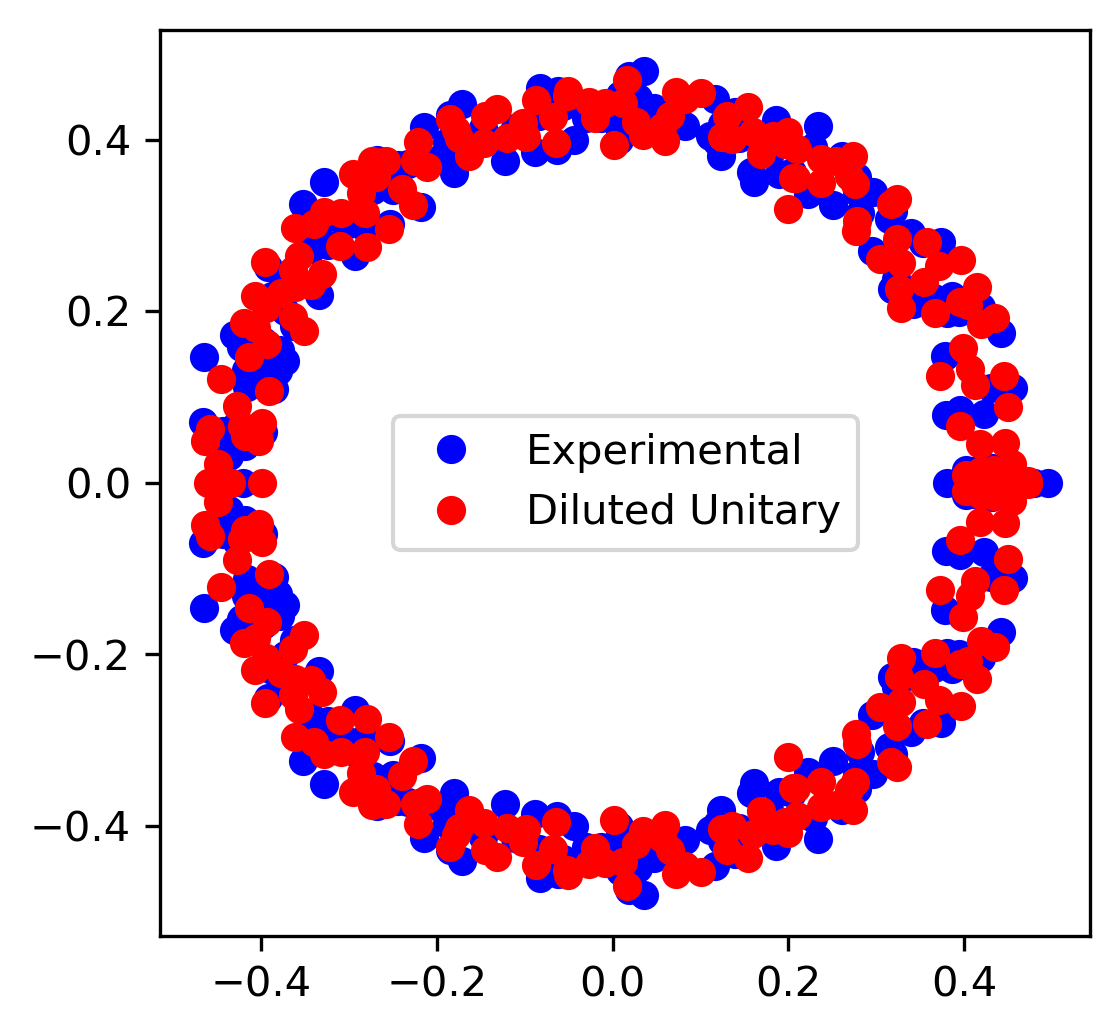

<tf.Tensor: shape=(), dtype=float64, numpy=0.02576461759767949>

In [4]:
spectrum_model = channel_spectrum(model.channel.ensamble[0], keep_unity=False) 

fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')

plt.plot(spectrum1[:,0], spectrum1[:,1], "bo")
plt.plot(spectrum_model[:,0], spectrum_model[:,1], "ro")
plt.legend(["Experimental", "Diluted Unitary"])
plt.show()

channel_fidelity(model1.channel, model.channel.ensamble[0])

In [5]:
model.train(inputs = inputs, 
            targets = targets,
            num_iter = 1000, 
            N = 500, 
            verbose = True)

  0%|          | 0/1000 [00:00<?, ?it/s]

0.36987296493702193 None
0.301548003468102 None
0.2903970747937129 None
0.3034567432552025 None
0.29410555085798584 None
0.2851964484844172 None
0.28847501875199183 None
0.28558389463863043 None
0.29416984470042207 None
0.2840381247348309 None
0.28903582101475334 None


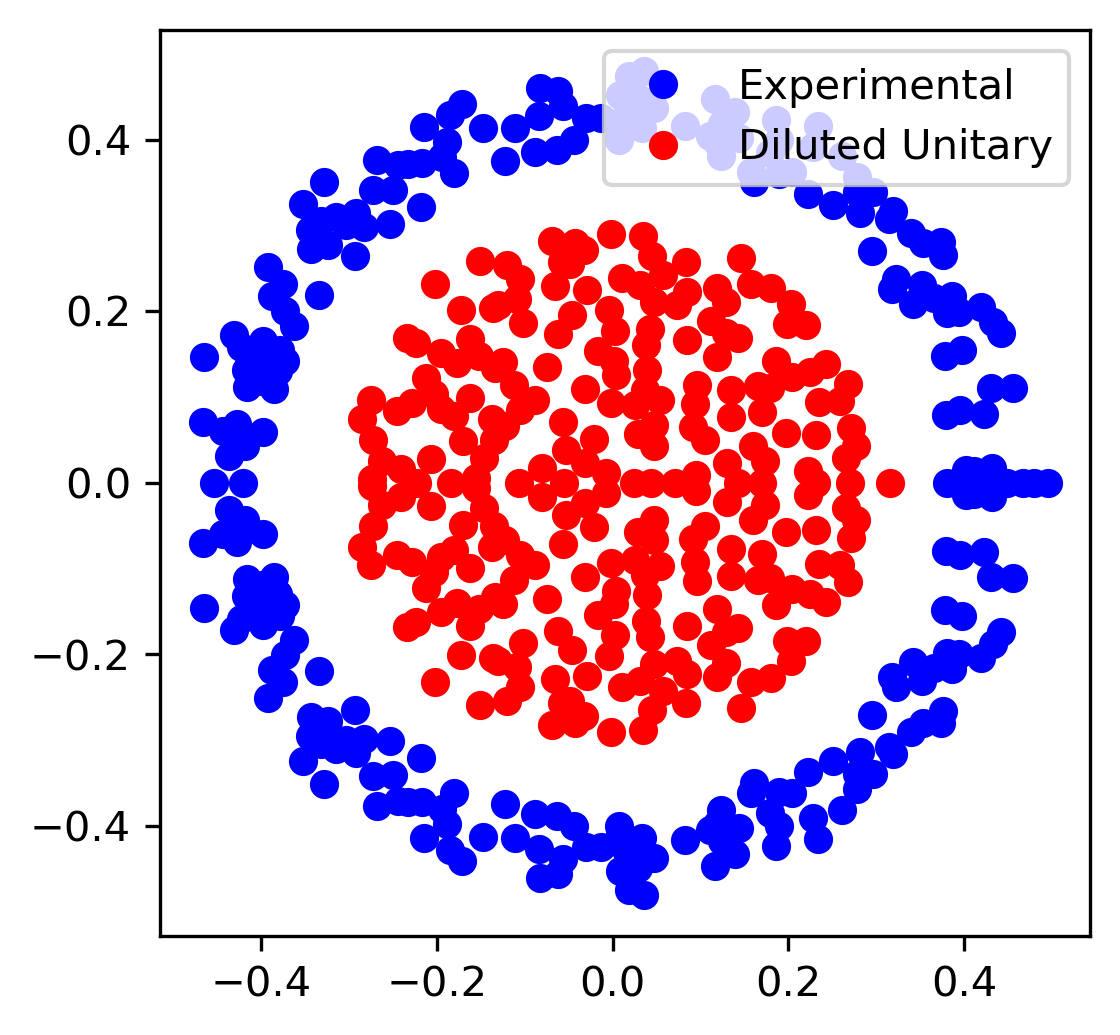

tf.Tensor(0.104029873731963, shape=(), dtype=float64)


In [6]:
spectrum_model = channel_spectrum(model.channel.ensamble[0], keep_unity=False) 

fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')

plt.plot(spectrum1[:,0], spectrum1[:,1], "bo")
plt.plot(spectrum_model[:,0], spectrum_model[:,1], "ro")
plt.legend(["Experimental", "Diluted Unitary"])
plt.show()

print(model.channel.ensamble[0].c)

#### Five Samples

In [7]:
np.random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

ensamble_diluted_unitary = EnsambleDilutedUnitary(d = d, 
                                                  c = 1 - 0.5659543898032584,
                                                  rank = 10,
                                                  samples = 5,
                                                  spam = model1.channel.spam)

model = ModelQuantumMap(channel = ensamble_diluted_unitary,
                        loss_function = EnsambleProbabilityMSE(),
                        optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                        logger = Logger(sample_freq = 100, loss_function = EnsambleProbabilityMSE()))

In [8]:
model.train(inputs = inputs, 
            targets = targets,
            num_iter = 1000, 
            N = 500, 
            verbose = True)

  0%|          | 0/1000 [00:00<?, ?it/s]

0.37747529161046955 None
0.3070428884190835 None
0.28101517890342403 None
0.28739957990276155 None
0.29014788729245555 None
0.28272912051946725 None
0.2870851962053337 None
0.2894252193843271 None
0.2843291766435975 None
0.2857445580331618 None
0.2902115874886334 None


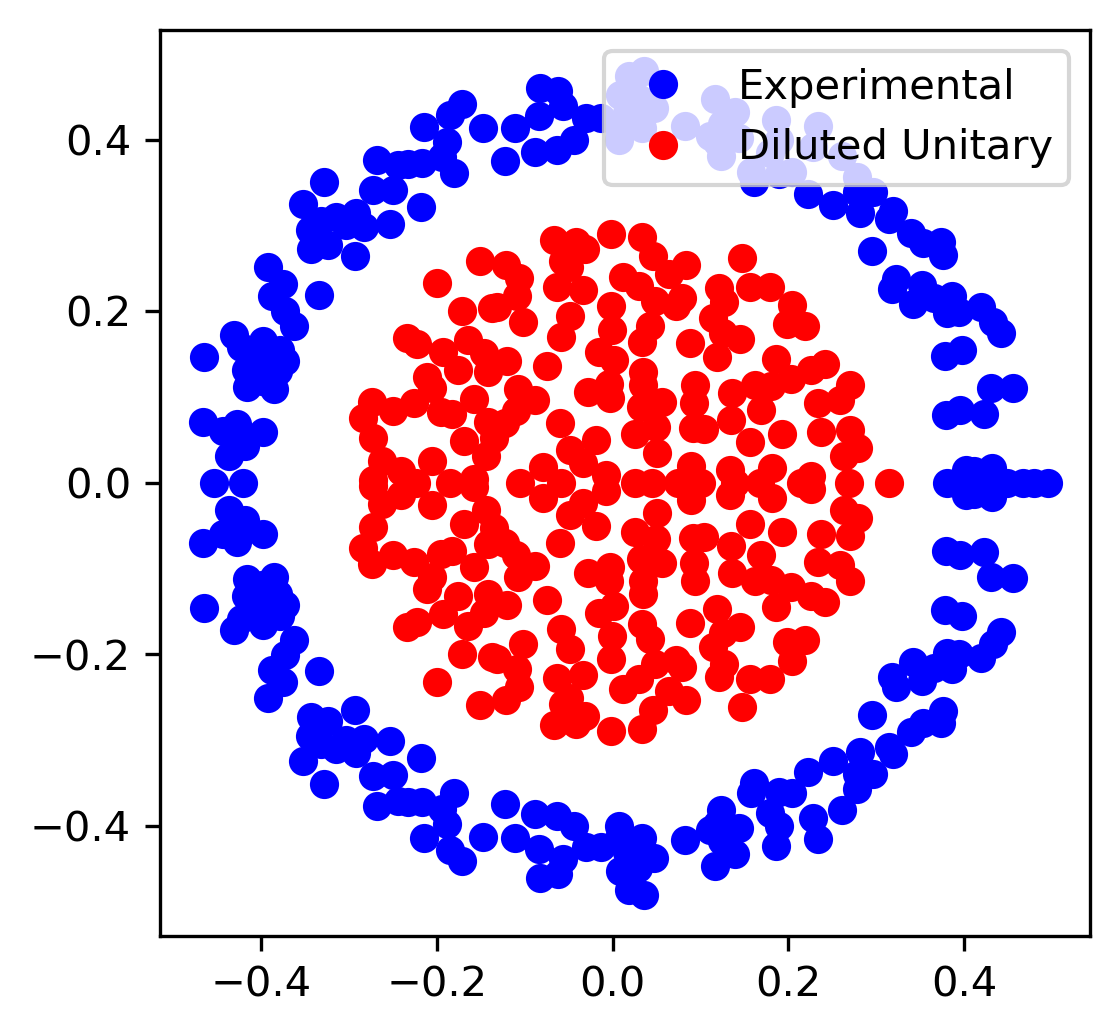

In [9]:
spectrum_model = channel_spectrum(model.channel.ensamble[0], keep_unity=False) 

fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')

plt.plot(spectrum1[:,0], spectrum1[:,1], "bo")
plt.plot(spectrum_model[:,0], spectrum_model[:,1], "ro")
plt.legend(["Experimental", "Diluted Unitary"])
plt.show()

In [10]:
np.random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

ensamble_diluted_unitary = EnsambleDilutedUnitary(d = d, 
                                                  c = 1 - 0.5659543898032584,
                                                  rank = 10,
                                                  samples = 25,
                                                  spam = model1.channel.spam)

model = ModelQuantumMap(channel = ensamble_diluted_unitary,
                        loss_function = EnsambleProbabilityMSE(),
                        optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                        logger = Logger(sample_freq = 10, loss_function = EnsambleProbabilityMSE()))

In [11]:
model.train(inputs = inputs, 
            targets = targets,
            num_iter = 1000, 
            N = 500, 
            verbose = True)

  0%|          | 0/1000 [00:00<?, ?it/s]

0.37342740288420195 None
0.3712657746735985 None
0.3567568927778103 None
0.3426262485167149 None
0.34251264546987076 None
0.32711961550239904 None
0.32556643441136635 None
0.3120098738612351 None
0.3135522377376244 None
0.3158632715730527 None
0.3052682951196244 None
0.29838007695411783 None
0.303145659553953 None
0.29977618745992884 None
0.2978048247962011 None
0.29529407989677725 None
0.291660433655007 None
0.29398212629989623 None
0.29513766954652737 None
0.29294308987589124 None
0.29256649064240475 None
0.29472373858072826 None
0.2883326096416369 None
0.29720100575018066 None
0.29178641898301694 None
0.2844923846303468 None
0.28428886899691297 None
0.2899610068951976 None
0.29305035683450503 None
0.28419074688369134 None
0.28959665219322883 None
0.2879762116073737 None
0.2969254668220515 None
0.28715674121444074 None
0.2897144774108336 None
0.283450666534803 None
0.2811225787751322 None
0.2866061037878607 None
0.291019129041571 None
0.2852484179665608 None
0.2925614704979104 None
0

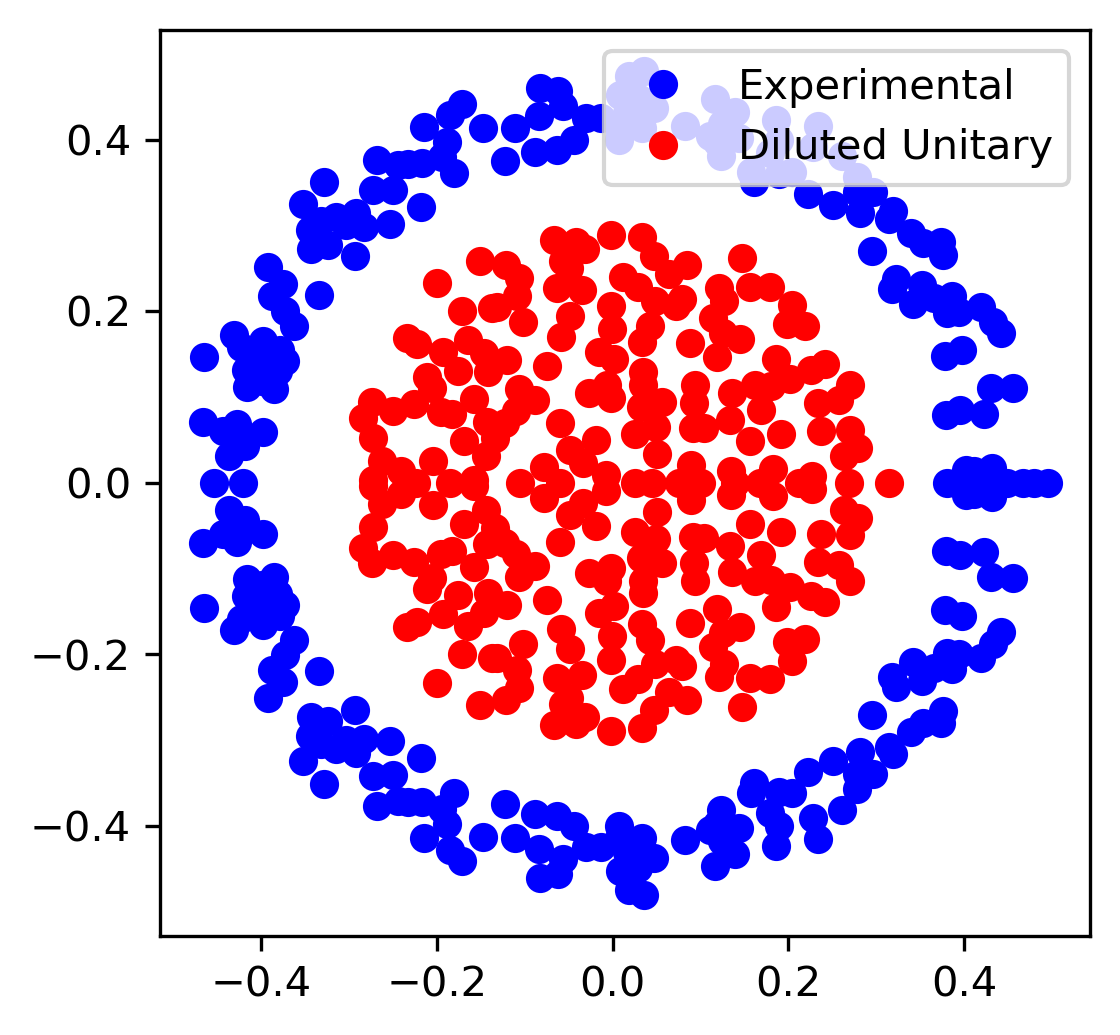

tf.Tensor(0.09768349426533864, shape=(), dtype=float64)


In [12]:
spectrum_model = channel_spectrum(model.channel.ensamble[0], keep_unity=False) 

fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')

plt.plot(spectrum1[:,0], spectrum1[:,1], "bo")
plt.plot(spectrum_model[:,0], spectrum_model[:,1], "ro")
plt.legend(["Experimental", "Diluted Unitary"])
plt.show()

print(model.channel.ensamble[0].c)

#### Circuit Unitary

In [39]:
np.random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

circuit_target = pqc_basic(n, 8)

U = circuit_to_matrix(circuit_target)
#U = generate_unitary(d)

ensamble_diluted_unitary = EnsambleDilutedUnitary(d = d, 
                                                  c = 1 - 0.5659543898032584,
                                                  rank = 10,
                                                  U = U,
                                                  samples = 1,
                                                  spam = model1.channel.spam)

model = ModelQuantumMap(channel = ensamble_diluted_unitary,
                        loss_function = EnsambleProbabilityMSE(),
                        optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                        logger = Logger(sample_freq = 100, loss_function = EnsambleProbabilityMSE()))

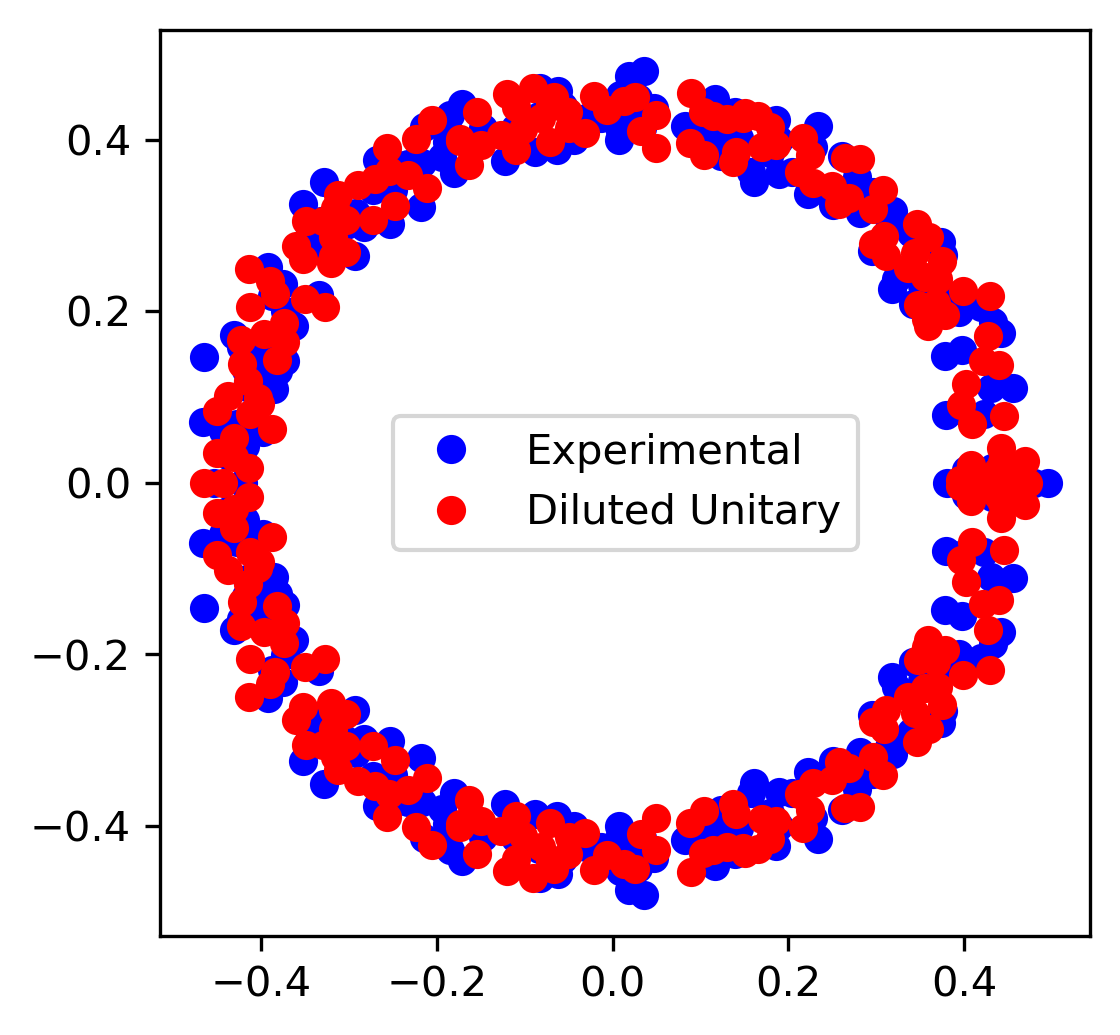

tf.Tensor(0.4340456101967416, shape=(), dtype=float64)


In [40]:
spectrum_model = channel_spectrum(model.channel.ensamble[0], keep_unity=False) 

fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')

plt.plot(spectrum1[:,0], spectrum1[:,1], "bo")
plt.plot(spectrum_model[:,0], spectrum_model[:,1], "ro")
plt.legend(["Experimental", "Diluted Unitary"])
plt.show()

print(model.channel.ensamble[0].c)

In [41]:
model.train(inputs = inputs, 
            targets = targets,
            num_iter = 1000, 
            N = 500, 
            verbose = True)

  0%|          | 0/1000 [00:00<?, ?it/s]

0.09735983952265508 None
0.09716786002657664 None
0.09808083599839645 None
0.09787876814402627 None
0.09608921298544328 None
0.09496311905675389 None
0.09800647236084543 None
0.09954572350356126 None
0.10038983724758335 None
0.10050727157578712 None
0.09630394210587731 None


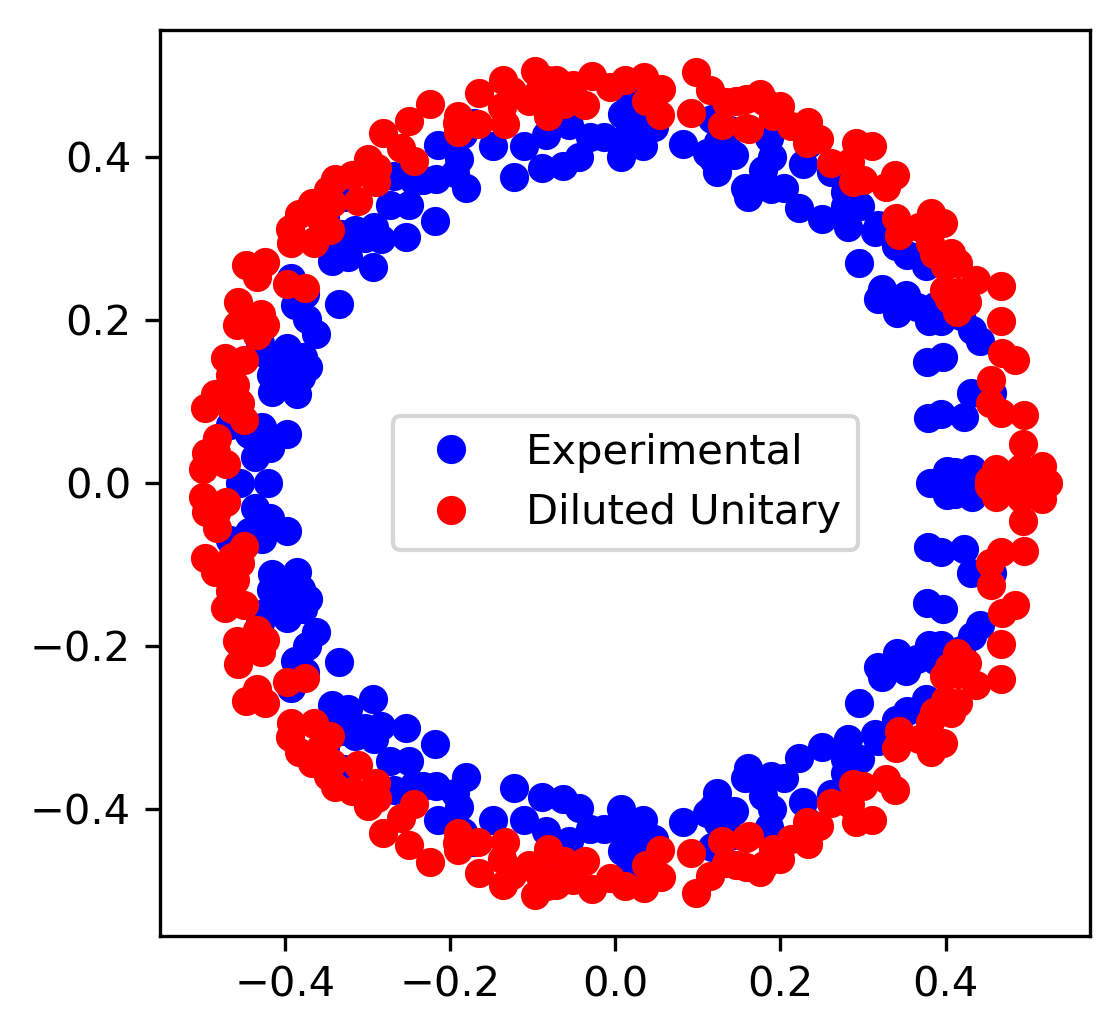

tf.Tensor(0.4865283559162715, shape=(), dtype=float64)


In [42]:
spectrum_model = channel_spectrum(model.channel.ensamble[0], keep_unity=False) 

fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')

plt.plot(spectrum1[:,0], spectrum1[:,1], "bo")
plt.plot(spectrum_model[:,0], spectrum_model[:,1], "ro")
plt.legend(["Experimental", "Diluted Unitary"])
plt.show()

print(model.channel.ensamble[0].c)

In [17]:
np.random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

circuit_target = pqc_basic(n, 8)

U = circuit_to_matrix(circuit_target)
#U = generate_unitary(d)

ensamble_diluted_unitary = EnsambleDilutedUnitary(d = d, 
                                                  c = 1 - 0.5659543898032584,
                                                  rank = 10,
                                                  U = U,
                                                  samples = 25,
                                                  spam = model1.channel.spam)

model = ModelQuantumMap(channel = ensamble_diluted_unitary,
                        loss_function = EnsambleProbabilityMSE(),
                        optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                        logger = Logger(sample_freq = 100, loss_function = EnsambleProbabilityMSE()))

In [18]:
model.train(inputs = inputs, 
            targets = targets,
            num_iter = 1000, 
            N = 500, 
            verbose = True)

  0%|          | 0/1000 [00:00<?, ?it/s]

0.09990037017917595 None
0.10536752551103784 None
0.10120318636646312 None
0.10116485109767515 None
0.096987303329119 None
0.09965442865772894 None
0.10094600144853397 None
0.10112205205545838 None
0.09996596309692428 None
0.09762378083547228 None
0.10003156196697383 None


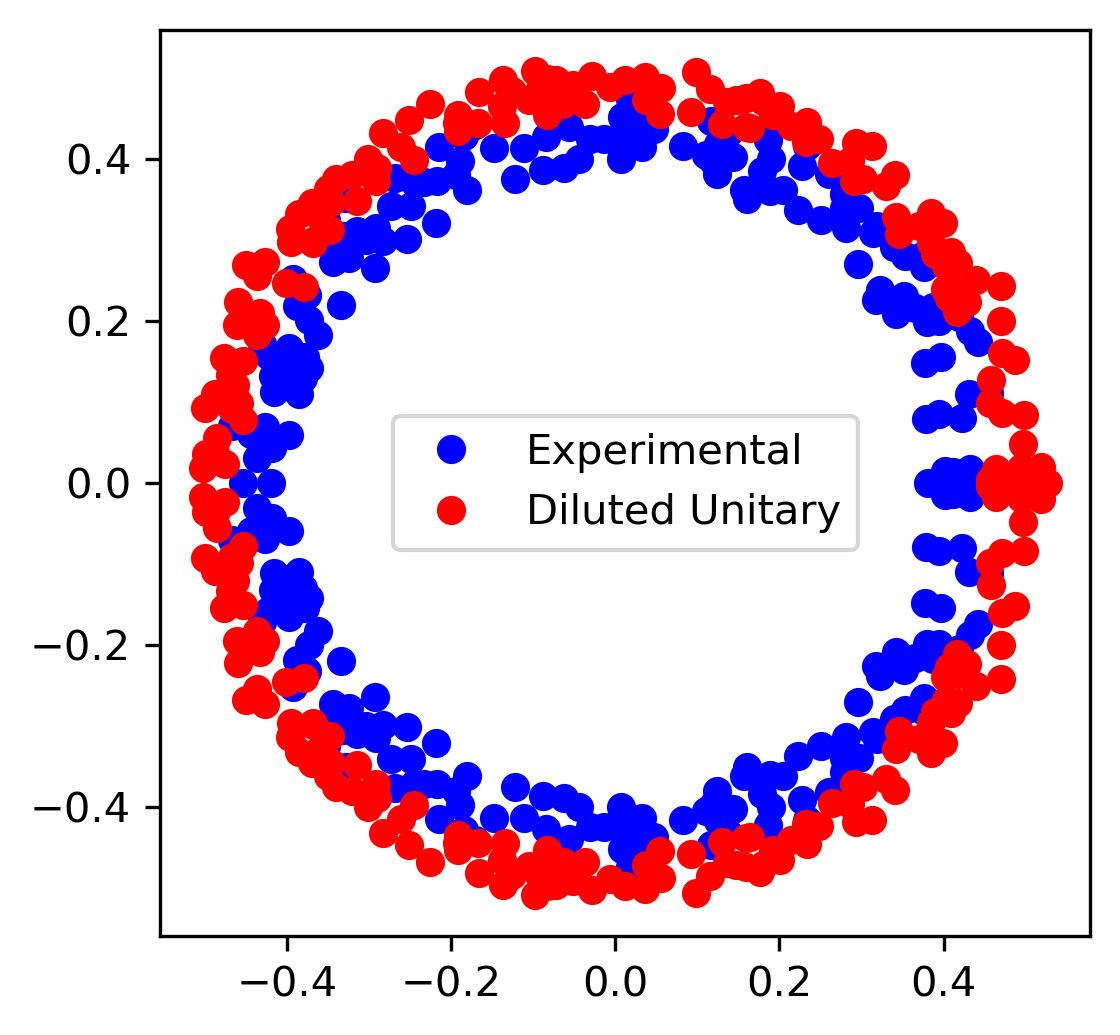

tf.Tensor(0.4899749450049104, shape=(), dtype=float64)


In [19]:
spectrum_model = channel_spectrum(model.channel.ensamble[0], keep_unity=False) 

fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')

plt.plot(spectrum1[:,0], spectrum1[:,1], "bo")
plt.plot(spectrum_model[:,0], spectrum_model[:,1], "ro")
plt.legend(["Experimental", "Diluted Unitary"])
plt.show()

print(model.channel.ensamble[0].c)

### Synthetic Data

In [20]:
from synthetic_data import generate_map_data
from spam import IdealSPAM

In [21]:
np.random.seed(42)
tf.random.set_seed(42)
n = 4
d = 2**n

U = generate_unitary(d)
channel_target = DilutedKrausMap(U = U, c = 0.5, kraus_part=KrausMap(d=d, rank=10))
spectrum_target = channel_spectrum(channel_target, keep_unity=False)

inputs, targets = generate_map_data(channel_target, spam_target=IdealSPAM(d), N_map=10000, shots=1024)

#### Single Sample

In [22]:
np.random.seed(43)
tf.random.set_seed(43)

ensamble_diluted_unitary = EnsambleDilutedUnitary(d = d, 
                                                  c = 0.5,
                                                  rank = 10,
                                                  U = U,
                                                  samples = 1,
                                                  spam = IdealSPAM(d))

model = ModelQuantumMap(channel = ensamble_diluted_unitary,
                        loss_function = EnsambleProbabilityMSE(),
                        optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                        logger = Logger(sample_freq = 100, loss_function = EnsambleProbabilityMSE()))



In [23]:
model.train(inputs = inputs, 
            targets = targets,
            num_iter = 1000, 
            N = 500, 
            verbose = True)

  0%|          | 0/1000 [00:00<?, ?it/s]

0.06024053946033429 None
0.059109602365371175 None
0.05918751035957705 None
0.05761251668540899 None
0.05835604806966421 None
0.05904174124390887 None
0.059941950741455266 None
0.05959228509501151 None
0.058870633903002983 None
0.05877891371117918 None
0.06007703201244304 None


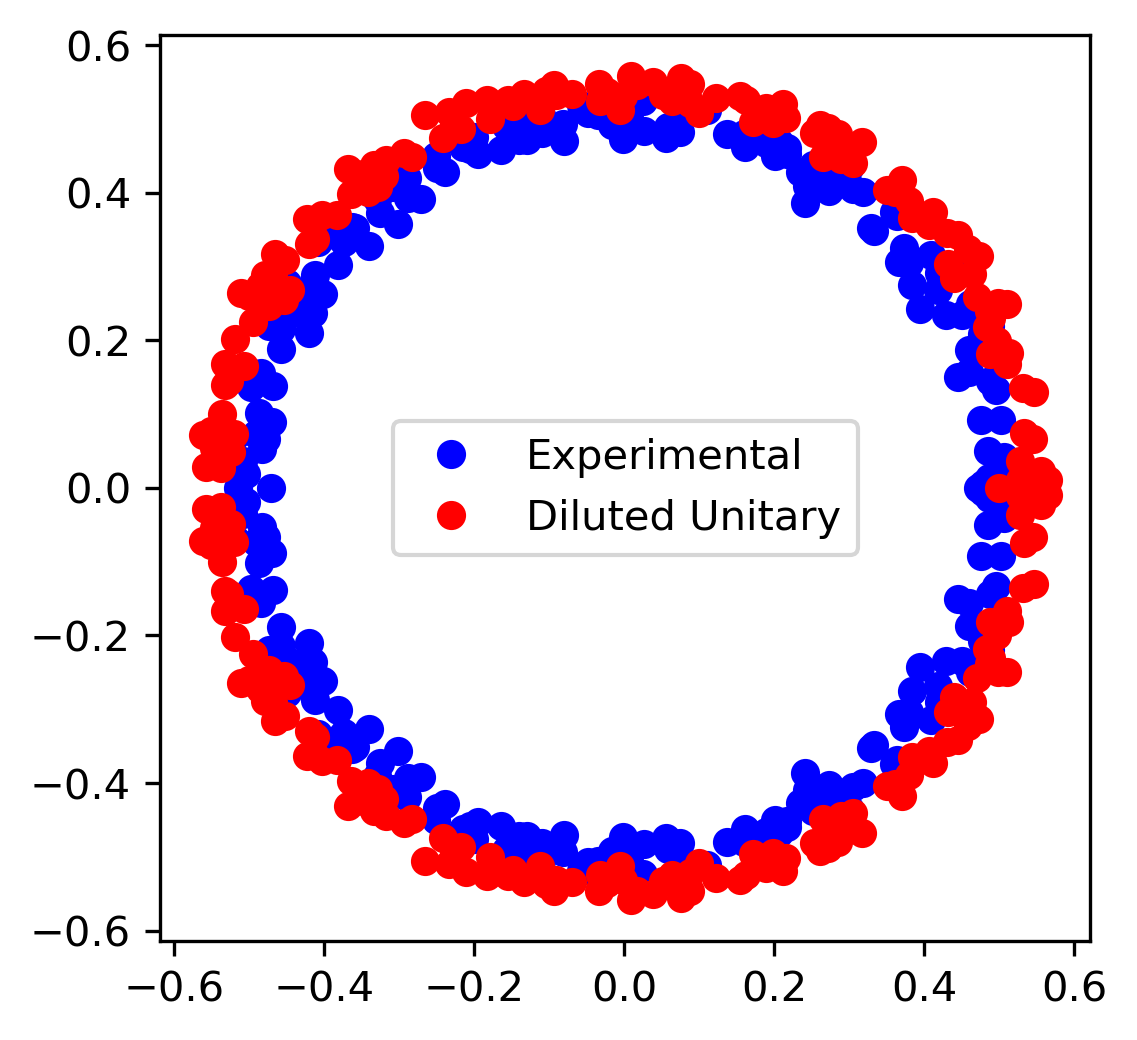

tf.Tensor(0.5437762191592481, shape=(), dtype=float64)


In [24]:
spectrum_model = channel_spectrum(model.channel.ensamble[0], keep_unity=False) 

fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')

plt.plot(spectrum_target[:,0], spectrum_target[:,1], "bo")
plt.plot(spectrum_model[:,0], spectrum_model[:,1], "ro")
plt.legend(["Experimental", "Diluted Unitary"])
plt.show()

print(model.channel.ensamble[0].c)

#### More Samples

In [25]:
np.random.seed(43)
tf.random.set_seed(43)

ensamble_diluted_unitary = EnsambleDilutedUnitary(d = d, 
                                                  c = 0.5,
                                                  rank = 10,
                                                  U = U,
                                                  samples = 5,
                                                  spam = IdealSPAM(d))

model = ModelQuantumMap(channel = ensamble_diluted_unitary,
                        loss_function = EnsambleProbabilityMSE(),
                        optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                        logger = Logger(sample_freq = 100, loss_function = EnsambleProbabilityMSE())
                        )

In [26]:
model.train(inputs = inputs, 
            targets = targets,
            num_iter = 1000, 
            N = 500, 
            verbose = True)

  0%|          | 0/1000 [00:00<?, ?it/s]

0.06253630708189425 None
0.06035127151273836 None
0.05996296593951135 None
0.05968704842914261 None
0.059756813657506326 None
0.05965486250983515 None
0.059153855479770624 None
0.05980359102296125 None
0.05888282518039208 None
0.059132060600225266 None
0.06122228245113328 None


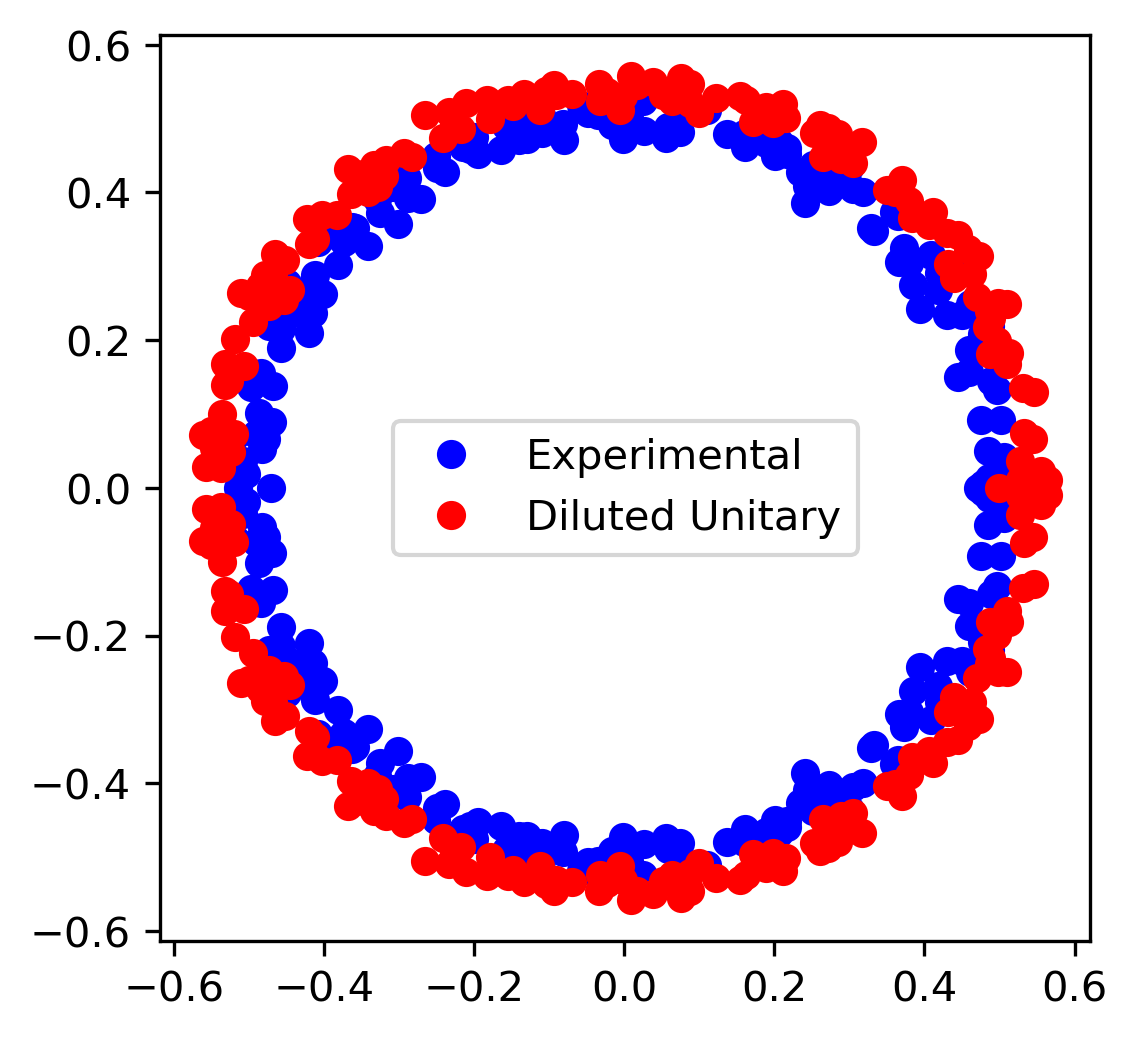

tf.Tensor(0.5436357932220376, shape=(), dtype=float64)


In [27]:
spectrum_model = channel_spectrum(model.channel.ensamble[0], keep_unity=False) 

fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')

plt.plot(spectrum_target[:,0], spectrum_target[:,1], "bo")
plt.plot(spectrum_model[:,0], spectrum_model[:,1], "ro")
plt.legend(["Experimental", "Diluted Unitary"])
plt.show()

print(model.channel.ensamble[0].c)

In [28]:
np.random.seed(43)
tf.random.set_seed(43)

ensamble_diluted_unitary = EnsambleDilutedUnitary(d = d, 
                                                  c = 0.5,
                                                  rank = 10,
                                                  U = U,
                                                  samples = 25,
                                                  spam = IdealSPAM(d))

model = ModelQuantumMap(channel = ensamble_diluted_unitary,
                        loss_function = EnsambleProbabilityMSE(),
                        optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                        logger = Logger(sample_freq = 100, loss_function = EnsambleProbabilityMSE())
                        )

In [29]:
model.train(inputs = inputs, 
            targets = targets,
            num_iter = 1000, 
            N = 500, 
            verbose = True)

  0%|          | 0/1000 [00:00<?, ?it/s]

0.06214267403854886 None
0.0593464490722472 None
0.060135248078998005 None
0.0603643466068115 None
0.05940766548370812 None
0.05851451365647038 None
0.05979824837306521 None
0.057642410421611785 None
0.05878145350367849 None
0.058941242422724784 None
0.059961788083367794 None


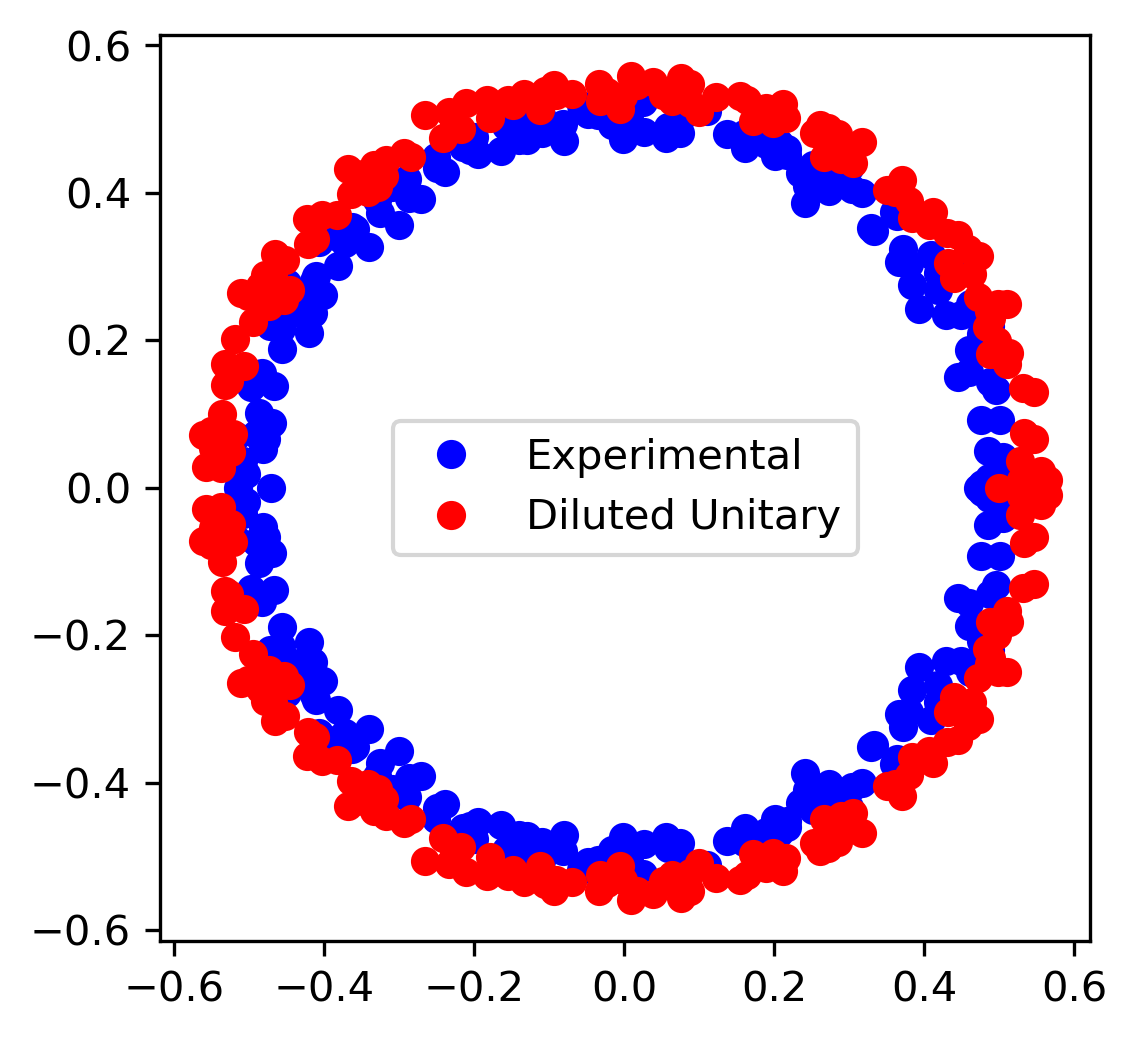

tf.Tensor(0.5443789500359956, shape=(), dtype=float64)


In [30]:
spectrum_model = channel_spectrum(model.channel.ensamble[0], keep_unity=False) 

fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')

plt.plot(spectrum_target[:,0], spectrum_target[:,1], "bo")
plt.plot(spectrum_model[:,0], spectrum_model[:,1], "ro")
plt.legend(["Experimental", "Diluted Unitary"])
plt.show()

print(model.channel.ensamble[0].c)

#### No Shot Noise

In [31]:
np.random.seed(42)
tf.random.set_seed(42)
n = 4
d = 2**n

U = generate_unitary(d)
channel_target = DilutedKrausMap(U = U, c = 0.5, kraus_part=KrausMap(d=d, rank=10))
spectrum_target = channel_spectrum(channel_target, keep_unity=False)

inputs, targets = generate_map_data(channel_target, spam_target=IdealSPAM(d), N_map=10000, shots=None)

In [32]:
np.random.seed(43)
tf.random.set_seed(43)

ensamble_diluted_unitary = EnsambleDilutedUnitary(d = d, 
                                                  c = 0.5,
                                                  rank = 10,
                                                  U = U,
                                                  samples = 1,
                                                  spam = IdealSPAM(d))

model = ModelQuantumMap(channel = ensamble_diluted_unitary,
                        loss_function = EnsambleProbabilityMSE(),
                        optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                        logger = Logger(sample_freq = 100, loss_function = EnsambleProbabilityMSE()))

In [33]:
model.train(inputs = inputs, 
            targets = targets,
            num_iter = 1000, 
            N = 500, 
            verbose = True)

  0%|          | 0/1000 [00:00<?, ?it/s]

0.04676552811375366 None
0.04489727289986827 None
0.04388754864132602 None
0.04286727414448797 None
0.043529398443091664 None
0.04464096519709129 None
0.044901270588695016 None
0.04572007984803983 None
0.044256348685996344 None
0.04382076816424179 None
0.04466557062985314 None


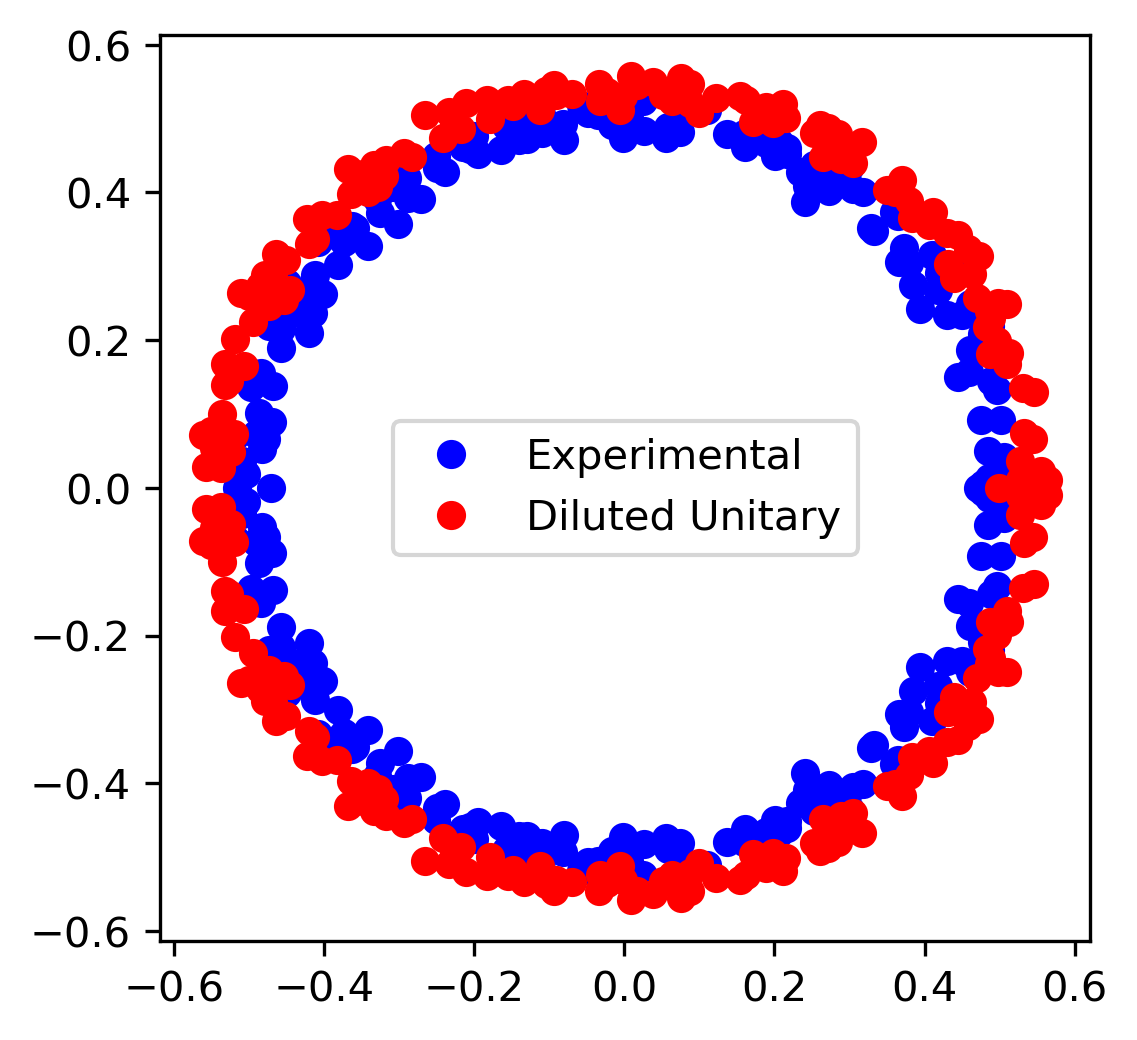

tf.Tensor(0.5434710653048757, shape=(), dtype=float64)


In [34]:
spectrum_model = channel_spectrum(model.channel.ensamble[0], keep_unity=False) 

fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')

plt.plot(spectrum_target[:,0], spectrum_target[:,1], "bo")
plt.plot(spectrum_model[:,0], spectrum_model[:,1], "ro")
plt.legend(["Experimental", "Diluted Unitary"])
plt.show()

print(model.channel.ensamble[0].c)

In [35]:
np.random.seed(43)
tf.random.set_seed(43)

ensamble_diluted_unitary = EnsambleDilutedUnitary(d = d, 
                                                  c = 0.5,
                                                  rank = 10,
                                                  U = U,
                                                  samples = 25,
                                                  spam = IdealSPAM(d))

model = ModelQuantumMap(channel = ensamble_diluted_unitary,
                        loss_function = EnsambleProbabilityMSE(),
                        optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                        logger = Logger(sample_freq = 100, loss_function = EnsambleProbabilityMSE()))

In [36]:
model.train(inputs = inputs, 
            targets = targets,
            num_iter = 1000, 
            N = 500, 
            verbose = True)

  0%|          | 0/1000 [00:00<?, ?it/s]

0.04750090262387716 None
0.04538230218867965 None
0.045337106224605586 None
0.0454382947021622 None
0.04495172532470404 None
0.04424482195591613 None
0.04472842749932734 None
0.0435793284153367 None
0.04444826095234806 None
0.0449538310178023 None
0.045299341849659364 None


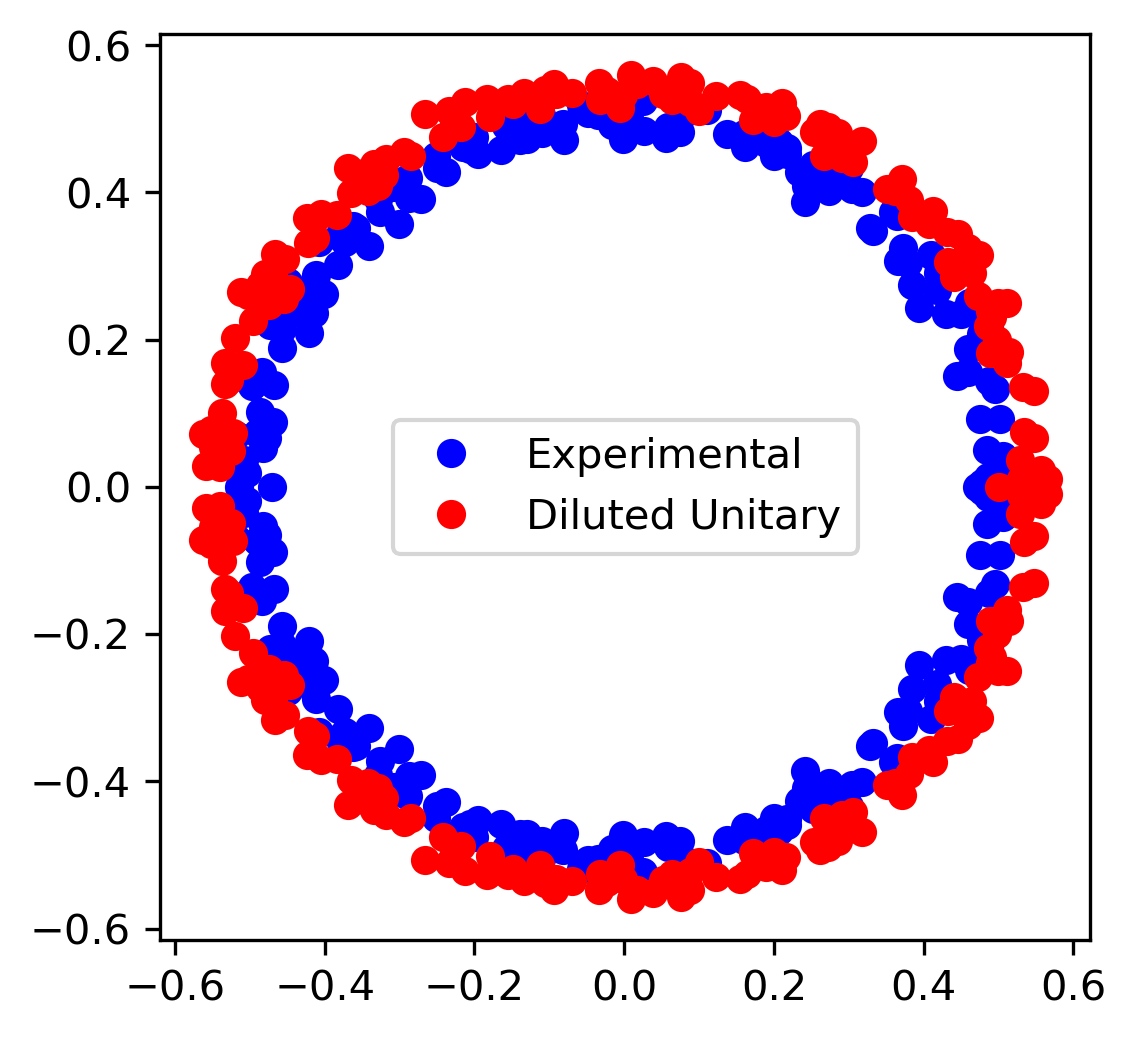

tf.Tensor(0.5453717952168051, shape=(), dtype=float64)


In [37]:
spectrum_model = channel_spectrum(model.channel.ensamble[0], keep_unity=False) 

fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')

plt.plot(spectrum_target[:,0], spectrum_target[:,1], "bo")
plt.plot(spectrum_model[:,0], spectrum_model[:,1], "ro")
plt.legend(["Experimental", "Diluted Unitary"])
plt.show()

print(model.channel.ensamble[0].c)